<br><font face = "Verdana" size = "4">Evaluation Project - 3
<br><font face = "Verdana" size = "2">HR Analytics Project- Understanding the Attrition in HR
<br><font face = "Verdana" size = "2">Problem Statement:
<br><font face = "Verdana" size = "2">Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">HR Analytics
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">Attrition in HR
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">Attrition affecting Companies
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2"> 
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">Note: You can find the dataset in the link below.
<br><font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">Downlaod Files:
<br><font face = "Verdana" size = "2">https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [6]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

 <hr><font face = "Verdana" size = "4"> <b> 1) importing  data

In [183]:
df = pd.read_csv(r"C:\Users\Kundan Patil\DS0522\Evaluation Phase- Batch DS0522\Data-Science-ML-Capstone-Projects-master\IBM_HR_Attrition_Rate_Analytics-master\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv") # Reading the data file

In [184]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [185]:
df.shape

(1470, 35)

<font face = "Verdana" size = "4"> <b> 2) check data type of each column

In [186]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<font face = "Verdana" size = "4"> There are some catagorical columns Needs to perform encoding technique

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<font face = "Verdana" size = "4"> 2what we observed up to 
<br><font face = "Verdana" size = "2">1) No Null values are present in the data set
<br><font face = "Verdana" size = "2">2) only int and obj data we have

In [188]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<table class="table table-condensed">
<colgroup>
<col width="28%">
<col width="71%">
</colgroup>
<thead>
<tr class="header">
<th align="left">Name</th>
<th align="left">Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">AGE</td>
<td align="left">Numerical Value</td>
</tr>
<tr class="even">
<td align="left">ATTRITION</td>
<td align="left">Employee leaving the company (0=no, 1=yes)</td>
</tr>
<tr class="odd">
<td align="left">BUSINESS TRAVEL</td>
<td align="left">(1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)</td>
</tr>
<tr class="even">
<td align="left">DAILY RATE</td>
<td align="left">Numerical Value - Salary Level</td>
</tr>
<tr class="odd">
<td align="left">DEPARTMENT</td>
<td align="left">(1=HR, 2=R&amp;D, 3=Sales)</td>
</tr>
<tr class="even">
<td align="left">DISTANCE FROM HOME</td>
<td align="left">Numerical Value - THE DISTANCE FROM WORK TO HOME</td>
</tr>
<tr class="odd">
<td align="left">EDUCATION</td>
<td align="left">Numerical Value</td>
</tr>
<tr class="even">
<td align="left">EDUCATION FIELD</td>
<td align="left">(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)</td>
</tr>
<tr class="odd">
<td align="left">EMPLOYEE COUNT</td>
<td align="left">Numerical Value</td>
</tr>
<tr class="even">
<td align="left">EMPLOYEE NUMBER</td>
<td align="left">Numerical Value - EMPLOYEE ID</td>
</tr>
<tr class="odd">
<td align="left">ENVIROMENT SATISFACTION</td>
<td align="left">Numerical Value - SATISFACTION WITH THE ENVIROMENT</td>
</tr>
<tr class="even">
<td align="left">GENDER</td>
<td align="left">(1=FEMALE, 2=MALE)</td>
</tr>
<tr class="odd">
<td align="left">HOURLY RATE</td>
<td align="left">Numerical Value - HOURLY SALARY</td>
</tr>
<tr class="even">
<td align="left">JOB INVOLVEMENT</td>
<td align="left">Numerical Value - JOB INVOLVEMENT</td>
</tr>
<tr class="odd">
<td align="left">JOB LEVEL</td>
<td align="left">Numerical Value - LEVEL OF JOB</td>
</tr>
<tr class="even">
<td align="left">JOB ROLE</td>
<td align="left">(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)</td>
</tr>
<tr class="odd">
<td align="left">JOB SATISFACTION</td>
<td align="left">Numerical Value - SATISFACTION WITH THE JOB</td>
</tr>
<tr class="even">
<td align="left">MARITAL STATUS</td>
<td align="left">(1=DIVORCED, 2=MARRIED, 3=SINGLE)</td>
</tr>
<tr class="odd">
<td align="left">MONTHLY INCOME</td>
<td align="left">Numerical Value - MONTHLY SALARY</td>
</tr>
<tr class="even">
<td align="left">MONTHY RATE</td>
<td align="left">Numerical Value - MONTHY RATE</td>
</tr>
<tr class="odd">
<td align="left">NUMCOMPANIES WORKED</td>
<td align="left">Numerical Value - NO. OF COMPANIES WORKED AT</td>
</tr>
<tr class="even">
<td align="left">OVER 18</td>
<td align="left">(1=YES, 2=NO)</td>
</tr>
<tr class="odd">
<td align="left">OVERTIME</td>
<td align="left">(1=NO, 2=YES)</td>
</tr>
<tr class="even">
<td align="left">PERCENT SALARY HIKE</td>
<td align="left">Numerical Value - PERCENTAGE INCREASE IN SALARY</td>
</tr>
<tr class="odd">
<td align="left">PERFORMANCE RATING</td>
<td align="left">Numerical Value - ERFORMANCE RATING</td>
</tr>
<tr class="even">
<td align="left">RELATIONS SATISFACTION</td>
<td align="left">Numerical Value - RELATIONS SATISFACTION</td>
</tr>
<tr class="odd">
<td align="left">STANDARD HOURS</td>
<td align="left">Numerical Value - STANDARD HOURS</td>
</tr>
<tr class="even">
<td align="left">STOCK OPTIONS LEVEL</td>
<td align="left">Numerical Value - STOCK OPTIONS</td>
</tr>
<tr class="odd">
<td align="left">TOTAL WORKING YEARS</td>
<td align="left">Numerical Value - TOTAL YEARS WORKED</td>
</tr>
<tr class="even">
<td align="left">TRAINING TIMES LAST YEAR</td>
<td align="left">Numerical Value - HOURS SPENT TRAINING</td>
</tr>
<tr class="odd">
<td align="left">WORK LIFE BALANCE</td>
<td align="left">Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE</td>
</tr>
<tr class="even">
<td align="left">YEARS AT COMPANY</td>
<td align="left">Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY</td>
</tr>
<tr class="odd">
<td align="left">YEARS IN CURRENT ROLE</td>
<td align="left">Numerical Value -YEARS IN CURRENT ROLE</td>
</tr>
<tr class="even">
<td align="left">YEARS SINCE LAST PROMOTION</td>
<td align="left">Numerical Value - LAST PROMOTION</td>
</tr>
<tr class="odd">
<td align="left">YEARS WITH CURRENT MANAGER</td>
<td align="left">Numerical Value - YEARS SPENT WITH CURRENT MANAGER</td>
</tr>
</tbody>
</table>

In [189]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [190]:
df1=df.dropna()

In [191]:
print(df1.shape)
print(df.shape)

(1470, 35)
(1470, 35)


<font face = "Verdana" size = "4"> Drop Unwanted column 

In [192]:
df2=df1.drop(columns=['EmployeeCount', 'StandardHours','EmployeeNumber','Over18'], axis=1)

print(df2.shape),print(df1.shape),print(df.shape)

(1470, 31)
(1470, 35)
(1470, 35)


(None, None, None)

In [193]:
df2.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

<font face = "Verdana" size = "4">1)Age: Numerical Value , data type: int64

In [194]:
df['Age'].describe(include='all')

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

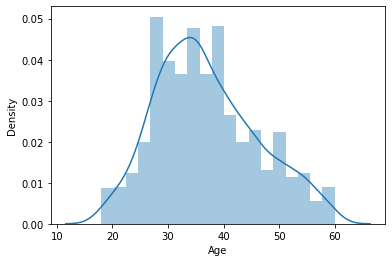

In [195]:
plt.plot()
sns.distplot(df['Age']) #distrubution plot to check the skewness 
plt.show()

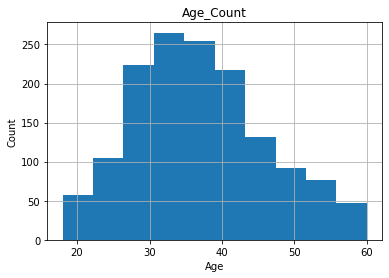

In [196]:
plt.plot()
df['Age'].hist(grid=True) #
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age_Count')
plt.show()

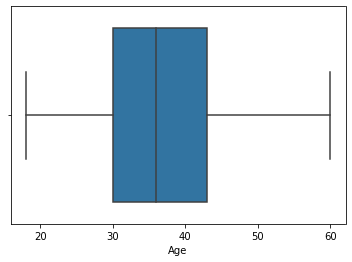

In [197]:
plt.plot()
sns.boxplot(df1['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

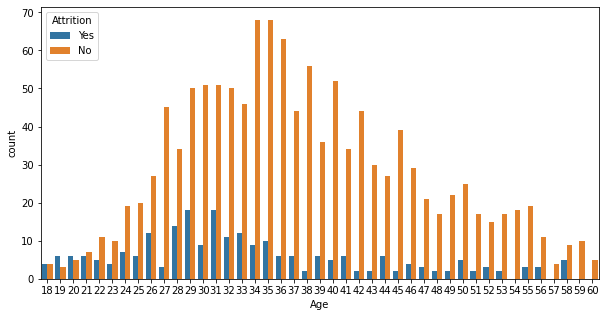

In [198]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Age", hue="Attrition",)

<font face = "Verdana" size = "3.4"> Observation for Age column 
  <font face = "Verdana" size = "3.4"> 
<br><tr>1) Age column numeric value given in year</tr>
<br>2) Data type is int and its is normally distributed
<br>3) maximum number of people are from the age 30 to 40
<br>4) no outliers in age column 
<br>5) Emp attrition yes is maximum for Age between 26 to 33

<hr><font face = "Verdana" size = "4">2)Attrition : Employee leaving the company (0=no, 1=yes)|| Target variable|| datatype object||


In [199]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Attrition']=le.fit_transform(df2['Attrition'])

In [200]:
df2['Attrition'].describe(include='all')

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

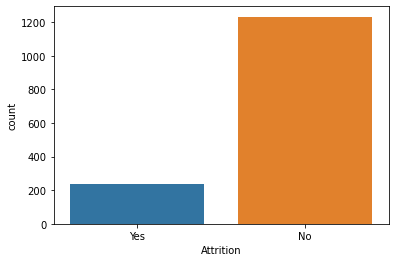

In [201]:
sns.countplot(data=df, x="Attrition" )

<font face = "Verdana" size = "3.4"> Observation for Attrition column<br> 
  <font face = "Verdana" size = "3.4"> there is problem of imbalanced dataset
 <br>we need to fix this !!

<font face = "Verdana" size = "4">3) BusinessTravel: (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)|| datatype: object||

In [202]:
le=LabelEncoder()
df2['BusinessTravel']=le.fit_transform(df2['BusinessTravel'])

In [203]:
df2['BusinessTravel'].describe(include='all')

count    1470.000000
mean        1.607483
std         0.665455
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: BusinessTravel, dtype: float64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

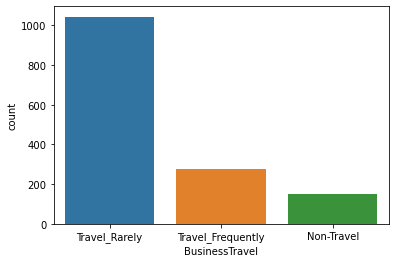

In [204]:
sns.countplot(data=df, x="BusinessTravel" )

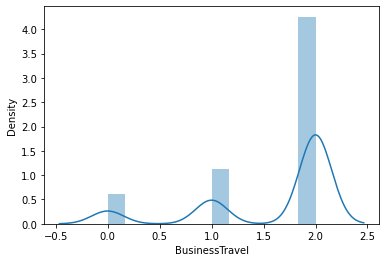

In [205]:
plt.plot()
sns.distplot(df2['BusinessTravel']) #distrubution plot to check the skewness 
plt.show()

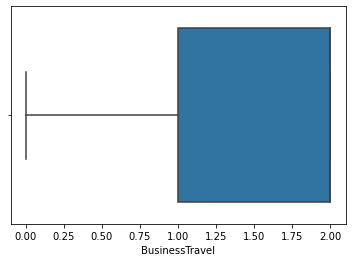

In [206]:
plt.plot()
sns.boxplot(df2['BusinessTravel'])
plt.show()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

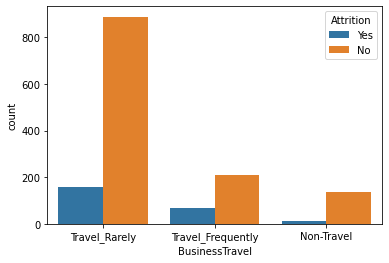

In [207]:
sns.countplot(data=df, x="BusinessTravel", hue="Attrition",)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

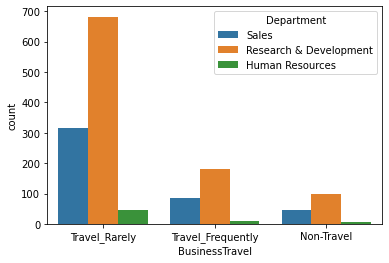

In [208]:
sns.countplot(data=df, x="BusinessTravel", hue="Department",)

<font face = "Verdana" size = "3.4"> Observation for BusinessTravel column<br>1) maximum number of people who travels rarely<br>
2) maximum number of people who travels rarely are from sales and R&D

<hr><font face = "Verdana" size = "4">4) DailyRate Numerical Value - Salary Level || datatye int64 ||
        

In [209]:
df['DailyRate'].describe(include='all')

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

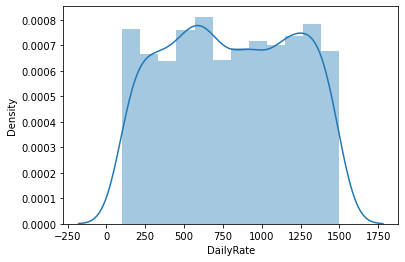

In [210]:
plt.plot()
sns.distplot(df['DailyRate']) #distrubution plot to check the skewness 
plt.show()

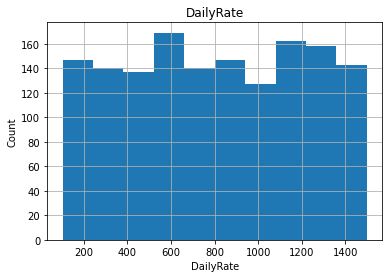

In [211]:
plt.plot()
df['DailyRate'].hist(grid=True) #
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.title('DailyRate')
plt.show()

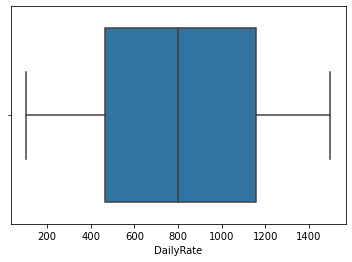

In [212]:
plt.plot()
sns.boxplot(df1['DailyRate'])
plt.show()

<font face = "Verdana" size = "3.5"> Observation for DailyRate column<br>
    No outliers 
noramlly normally distributed

<hr><font face = "Verdana" size = "4">5) Department : (1=HR, 2=R&D, 3=Sales) || datatype: object||

In [213]:
le=LabelEncoder()
df2['Department']=le.fit_transform(df2['Department'])

In [214]:
df['Department'].describe(include='all')

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

<AxesSubplot:xlabel='Department', ylabel='count'>

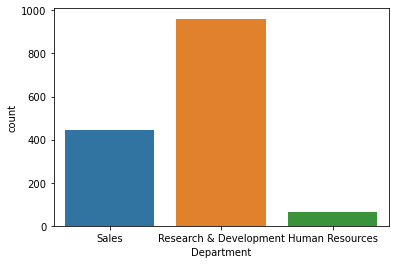

In [215]:
sns.countplot(data=df, x="Department", )

<AxesSubplot:xlabel='Department', ylabel='count'>

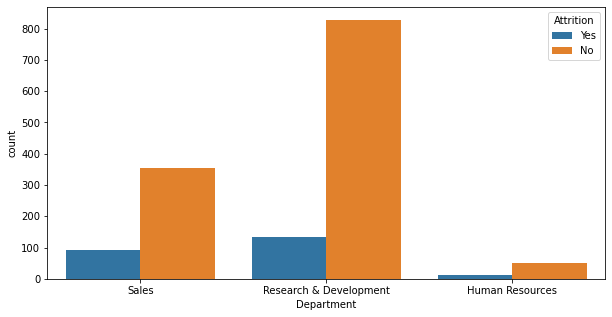

In [216]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="Attrition",)

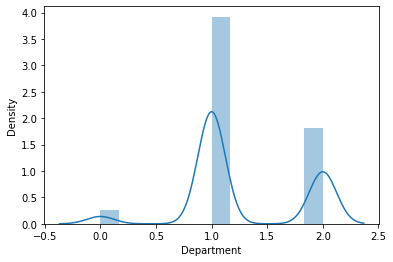

In [217]:
plt.plot()
sns.distplot(df2['Department']) #distrubution plot to check the skewness 
plt.show()

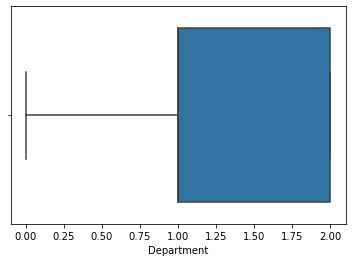

In [218]:
plt.plot()
sns.boxplot(df2['Department'])
plt.show()

<font face = "Verdana" size = "3.5"> Observation for Department column<br>
    maximum number of people come from R&D then followed by sales and other and same for the attrition 

 <font face = "Verdana" size = "4">6) DistanceFromHome || datatype int64 || THE DISTANCE FROM OFFICE TO HOME

In [219]:
df['DistanceFromHome'].describe(include='all')

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

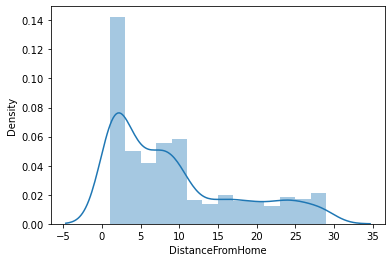

In [220]:
plt.plot()
sns.distplot(df['DistanceFromHome']) #distrubution plot to check the skewness 
plt.show()

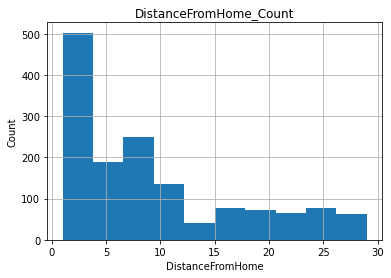

In [221]:
plt.plot()
df['DistanceFromHome'].hist(grid=True) #
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.title('DistanceFromHome_Count')
plt.show()

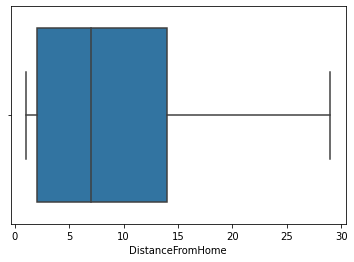

In [222]:
plt.plot()
sns.boxplot(df1['DistanceFromHome'])
plt.show()

<font face = "Verdana" size = "3.5"> Observation for DistanceFromHome column <br>
<br>some skewness is there 
<br>no outliers 
<br>maximum people who prefer to stay near about company

<hr> <font face = "Verdana" size = "4">7) Education || datatype int64 || 

In [223]:
df['Education'].describe(include='all')

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

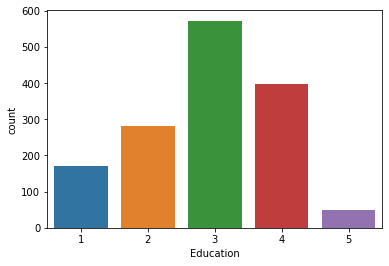

In [224]:
sns.countplot(data=df, x="Education", )

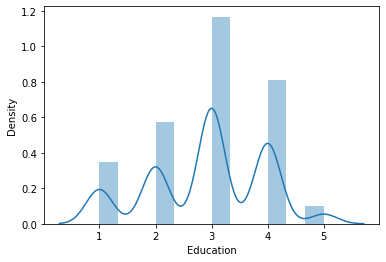

In [225]:
plt.plot()
sns.distplot(df['Education']) #distrubution plot to check the skewness 
plt.show()

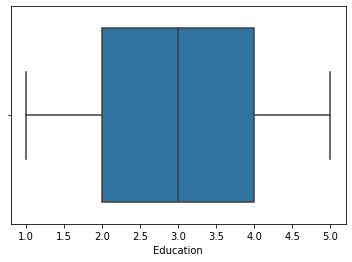

In [226]:
plt.plot()
sns.boxplot(df1['Education'])
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

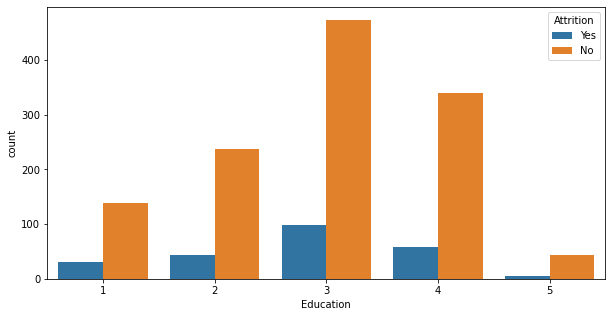

In [227]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Education", hue="Attrition",)

  <hr><font face = "Verdana" size = "4"> 8) EducationField 

In [228]:
le=LabelEncoder()
df2['EducationField']=le.fit_transform(df2['EducationField'])

In [229]:
df['EducationField'].describe(include='all')

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<AxesSubplot:xlabel='EducationField', ylabel='count'>

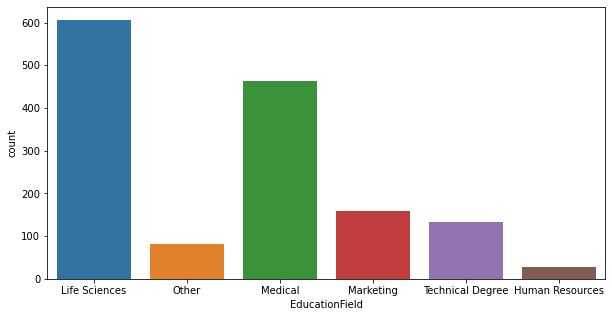

In [230]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EducationField",)

In [231]:
df['EducationField'].describe(include='all')

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<AxesSubplot:xlabel='EducationField', ylabel='count'>

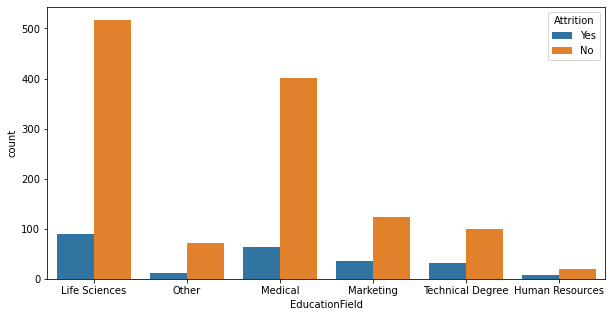

In [232]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EducationField", hue="Attrition",)

<font face = "Verdana" size = "3.5"> Observation for EducationField column <br> maximum people who come from life science , medical and same for the attrition 

   <hr><font face = "Verdana" size = "4">9) EmployeeCount || datatype int64 <br>
    10)    EmployeeNumber            

<font face = "Verdana" size = "3.5">We dont have too much with this column  we can drop this 

   <hr><font face = "Verdana" size = "4"> 11)  EnvironmentSatisfaction  datatye int || 

In [233]:
df['EnvironmentSatisfaction'].describe(include='all')

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

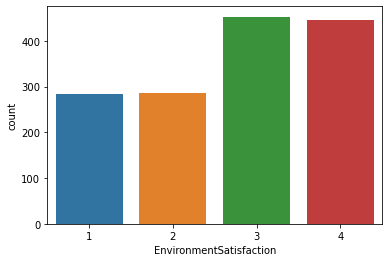

In [234]:
sns.countplot(data=df, x="EnvironmentSatisfaction", )

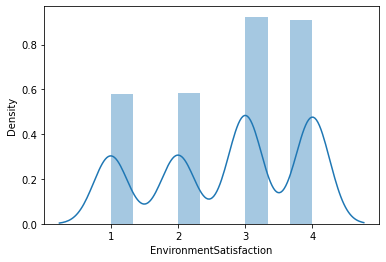

In [235]:
plt.plot()
sns.distplot(df['EnvironmentSatisfaction']) #distrubution plot to check the skewness 
plt.show()

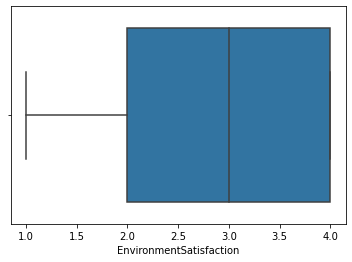

In [236]:
plt.plot()
sns.boxplot(df2['EnvironmentSatisfaction'])
plt.show()

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

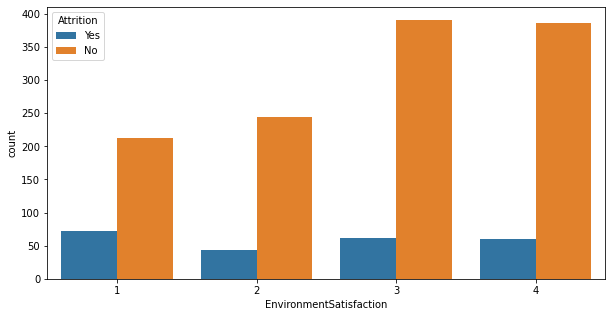

In [237]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EnvironmentSatisfaction", hue="Attrition",)

<font face = "Verdana" size = "3.5">Observations:
    <br>1) 60 % percent of people has voted for 3 and 4 

<hr><font face = "Verdana" size = "4"> 12) Gender|| datatype object ||

In [238]:
df2['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [239]:
df['Gender'].describe(include='all')

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

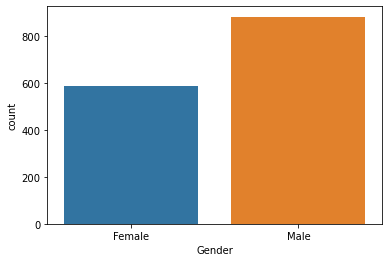

In [240]:
sns.countplot(data=df, x="Gender", )

<AxesSubplot:xlabel='Gender', ylabel='count'>

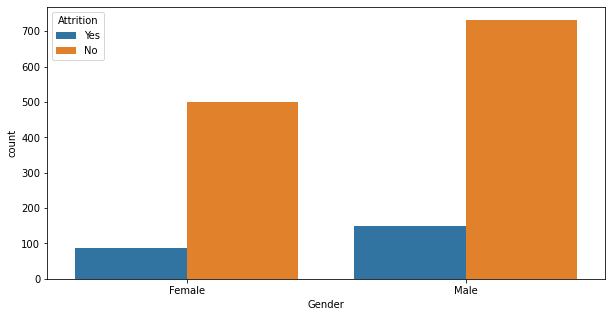

In [241]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Gender", hue="Attrition",)

<font face = "Verdana" size = "3.5"> We can see that mens are more in number than woman.

<hr><font face = "Verdana" size = "4"> 13)   HourlyRate datatype int

In [242]:
df['HourlyRate'].describe(include='all')

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

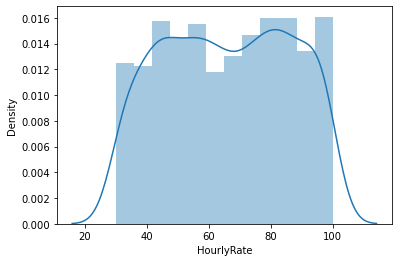

In [243]:
plt.plot()
sns.distplot(df['HourlyRate']) #distrubution plot to check the skewness 
plt.show()

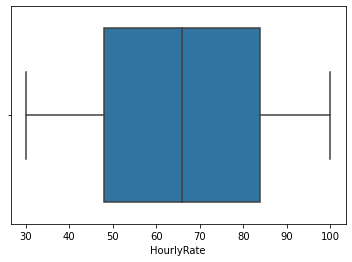

In [244]:
plt.plot()
sns.boxplot(df2['HourlyRate'])
plt.show()

<hr><font face = "Verdana" size = "4"> 14)  JobInvolvement  datatype int

In [245]:
df['JobInvolvement'].describe(include='all')

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

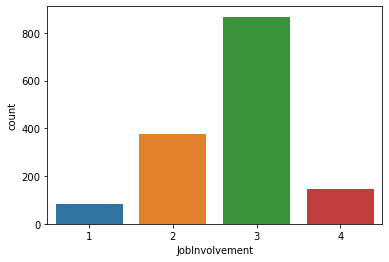

In [246]:
sns.countplot(data=df, x="JobInvolvement", )

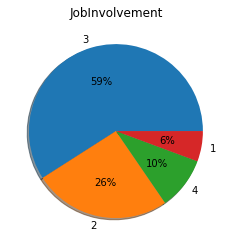

In [247]:
#pie chart
label=df['JobInvolvement'].unique()
y=df['JobInvolvement'].value_counts()
plt.title('JobInvolvement')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

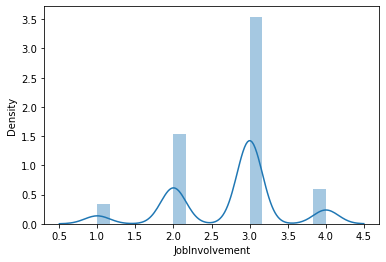

In [248]:
plt.plot()
sns.distplot(df['JobInvolvement']) #distrubution plot to check the skewness 
plt.show()

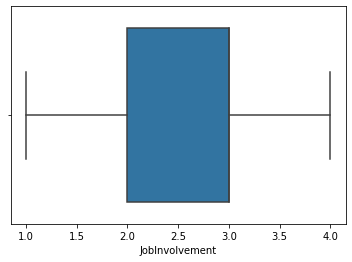

In [249]:
plt.plot()
sns.boxplot(df2['JobInvolvement'])
plt.show()

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

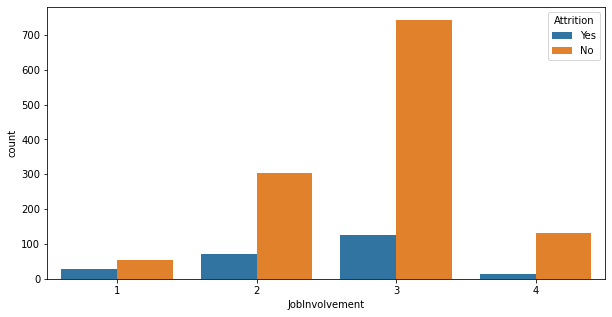

In [250]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="JobInvolvement", hue="Attrition",)

<hr><font face = "Verdana" size = "4"> 15  JobRole datatype object 

In [251]:
#checking unique
print(df['JobRole'].unique())
#count the unique values
print(df['JobRole'].value_counts())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [252]:
le=LabelEncoder()
df2['JobRole']=le.fit_transform(df2['JobRole'])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

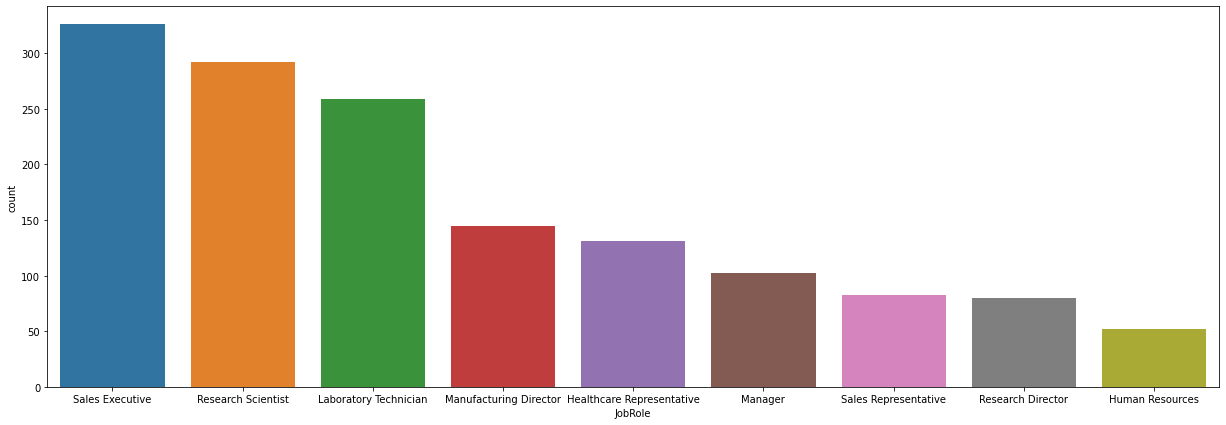

In [253]:
#count plot
plt.figure(figsize=(21,7))
sns.countplot(df['JobRole'])

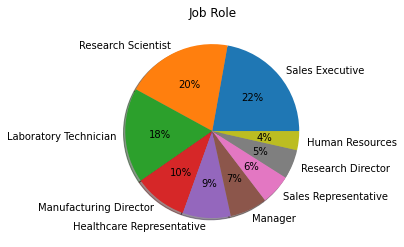

In [254]:
#pie chart
label=df['JobRole'].unique()
y=df['JobRole'].value_counts()


plt.title('Job Role')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

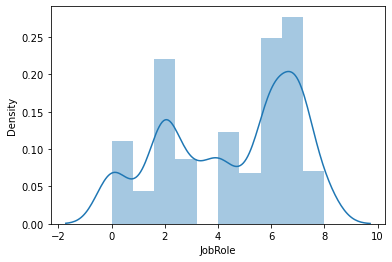

In [255]:
plt.plot()
sns.distplot(df2['JobRole']) #distrubution plot to check the skewness 
plt.show()

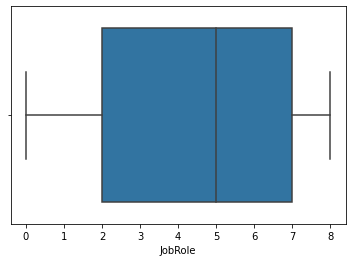

In [256]:
plt.plot()
sns.boxplot(df2['JobRole'])
plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='count'>

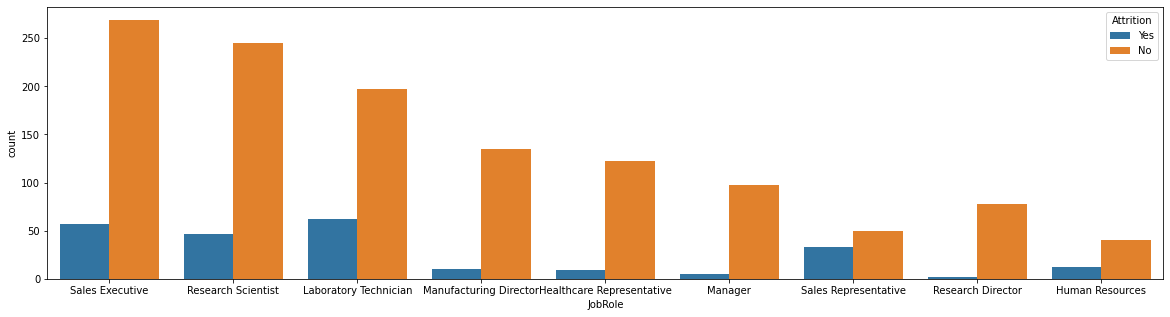

In [257]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x="JobRole", hue="Attrition",)

<font face = "Verdana" size = "3.5"> 1.Most of the employees belongs to Sales Executive and Research Scientist category, and then Laboratory Technician

<hr><font face = "Verdana" size = "4"> 16)   JobSatisfaction datatype int

In [258]:
df['JobSatisfaction'].describe(include='all')

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

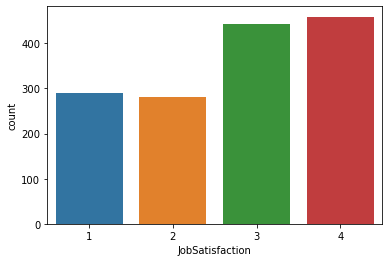

In [259]:
sns.countplot(data=df, x="JobSatisfaction", )

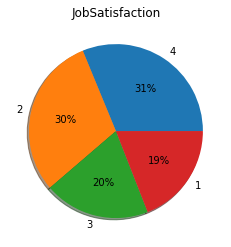

In [260]:
#pie chart
label=df['JobSatisfaction'].unique()
y=df['JobSatisfaction'].value_counts()


plt.title('JobSatisfaction')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

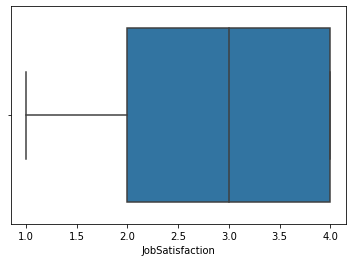

In [261]:
plt.plot()
sns.boxplot(df2['JobSatisfaction'])
plt.show()

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

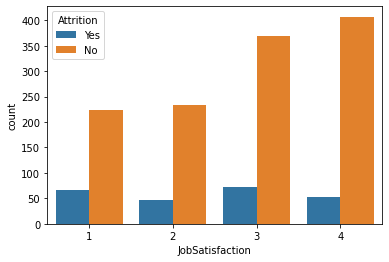

In [262]:
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition",)

 # 18  MaritalStatus

In [263]:
le=LabelEncoder()
df2['MaritalStatus']=le.fit_transform(df2['MaritalStatus'])

In [264]:
#checking unique
print(df['MaritalStatus'].unique())
#count the unique values
print(df['MaritalStatus'].value_counts())

['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

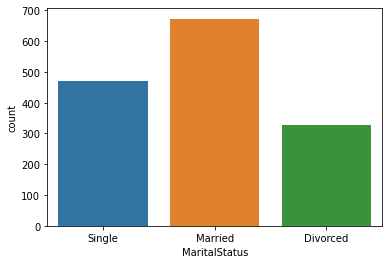

In [265]:
#count plot
sns.countplot(df['MaritalStatus'])

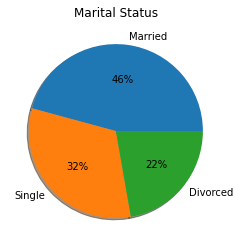

In [266]:
#pie chart
label=(['Married','Single','Divorced'])
y=df['MaritalStatus'].value_counts()

plt.title('Marital Status')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

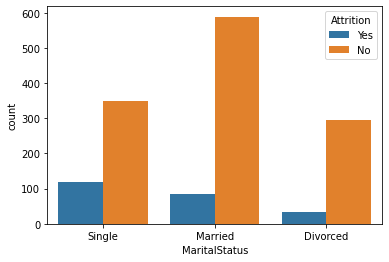

In [267]:
sns.countplot(data=df, x="MaritalStatus", hue="Attrition",)

# 19  MonthlyIncome 

In [268]:
df['MonthlyIncome'].describe(include='all')

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

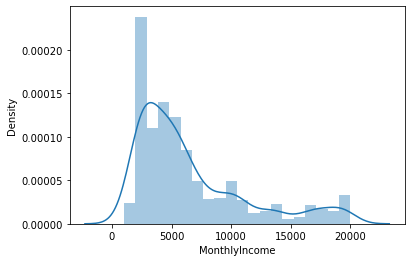

In [269]:
plt.plot()
sns.distplot(df['MonthlyIncome']) #distrubution plot to check the skewness 
plt.show()

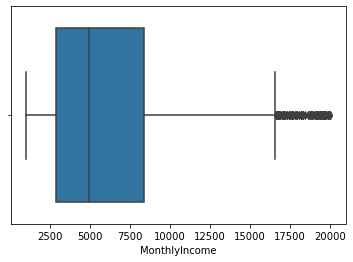

In [270]:
plt.plot()
sns.boxplot(df2['MonthlyIncome'])
plt.show()

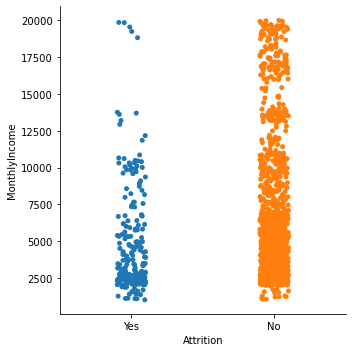

In [271]:
sns.catplot(x = 'Attrition', y = 'MonthlyIncome', data =df)
plt.show()

Observations:
   - high attrition for emp whoes salary is less than 7500 
   - Most of the employees are getting under 10k.
   - There are outliers.


 # 20  MonthlyRate

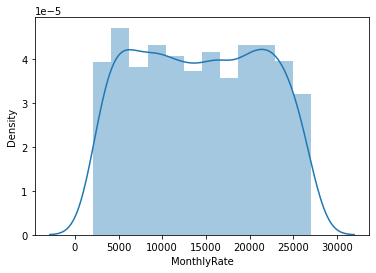

In [272]:
plt.plot()
sns.distplot(df['MonthlyRate']) #distrubution plot to check the skewness 
plt.show()

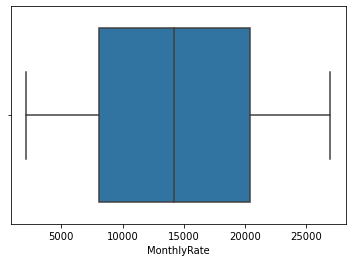

In [273]:
plt.plot()
sns.boxplot(df2['MonthlyRate'])
plt.show()

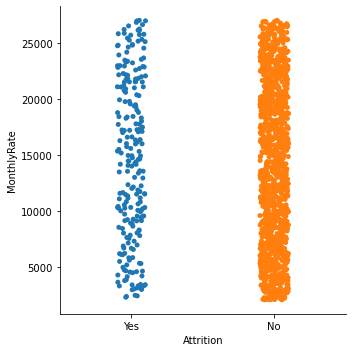

In [274]:
sns.catplot(x = 'Attrition', y = 'MonthlyRate', data =df)
plt.show()

 # 21)  NumCompaniesWorked

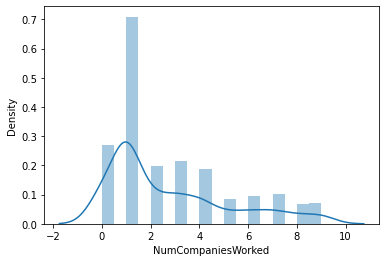

In [275]:
plt.plot()
sns.distplot(df['NumCompaniesWorked']) #distrubution plot to check the skewness 
plt.show()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

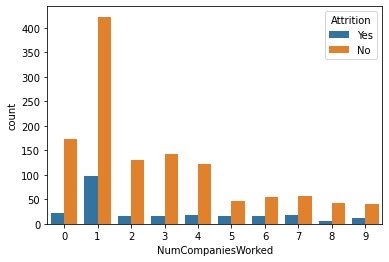

In [276]:
sns.countplot(data=df, x="NumCompaniesWorked", hue="Attrition",)

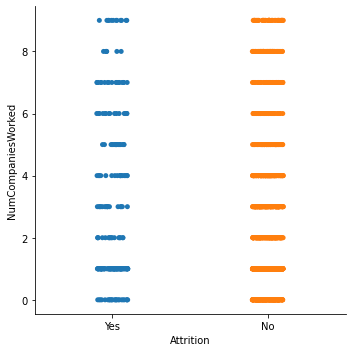

In [277]:
sns.catplot(x = 'Attrition', y = 'NumCompaniesWorked', data =df)
plt.show()

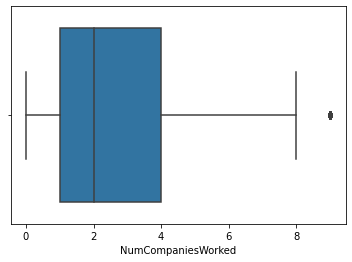

In [278]:
plt.plot()
sns.boxplot(df2['NumCompaniesWorked'])
plt.show()

# 22  OverTime 

In [279]:
le=LabelEncoder()
df2['OverTime']=le.fit_transform(df2['OverTime'])

In [280]:
df2['OverTime'].describe(include='all')

count    1470.000000
mean        0.282993
std         0.450606
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OverTime, dtype: float64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

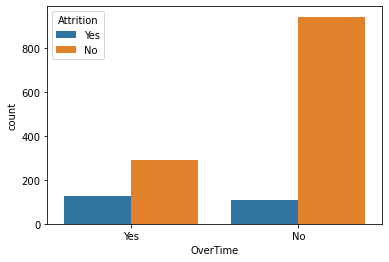

In [281]:
sns.countplot(data=df, x="OverTime", hue="Attrition",)

# 23 PercentSalaryHike

In [282]:
df2['PercentSalaryHike'].describe(include='all')

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

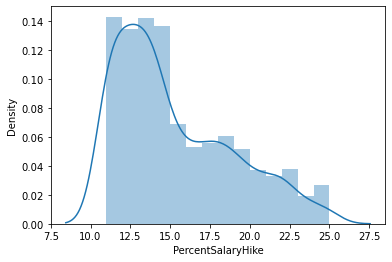

In [283]:
plt.plot()
sns.distplot(df['PercentSalaryHike']) #distrubution plot to check the skewness 
plt.show()

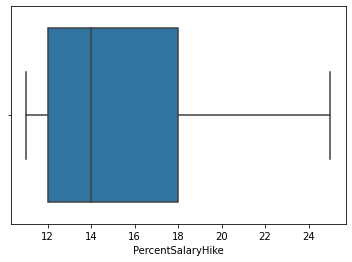

In [284]:
plt.plot()
sns.boxplot(df2['PercentSalaryHike'])
plt.show()

# visualizing outliers for all columns   

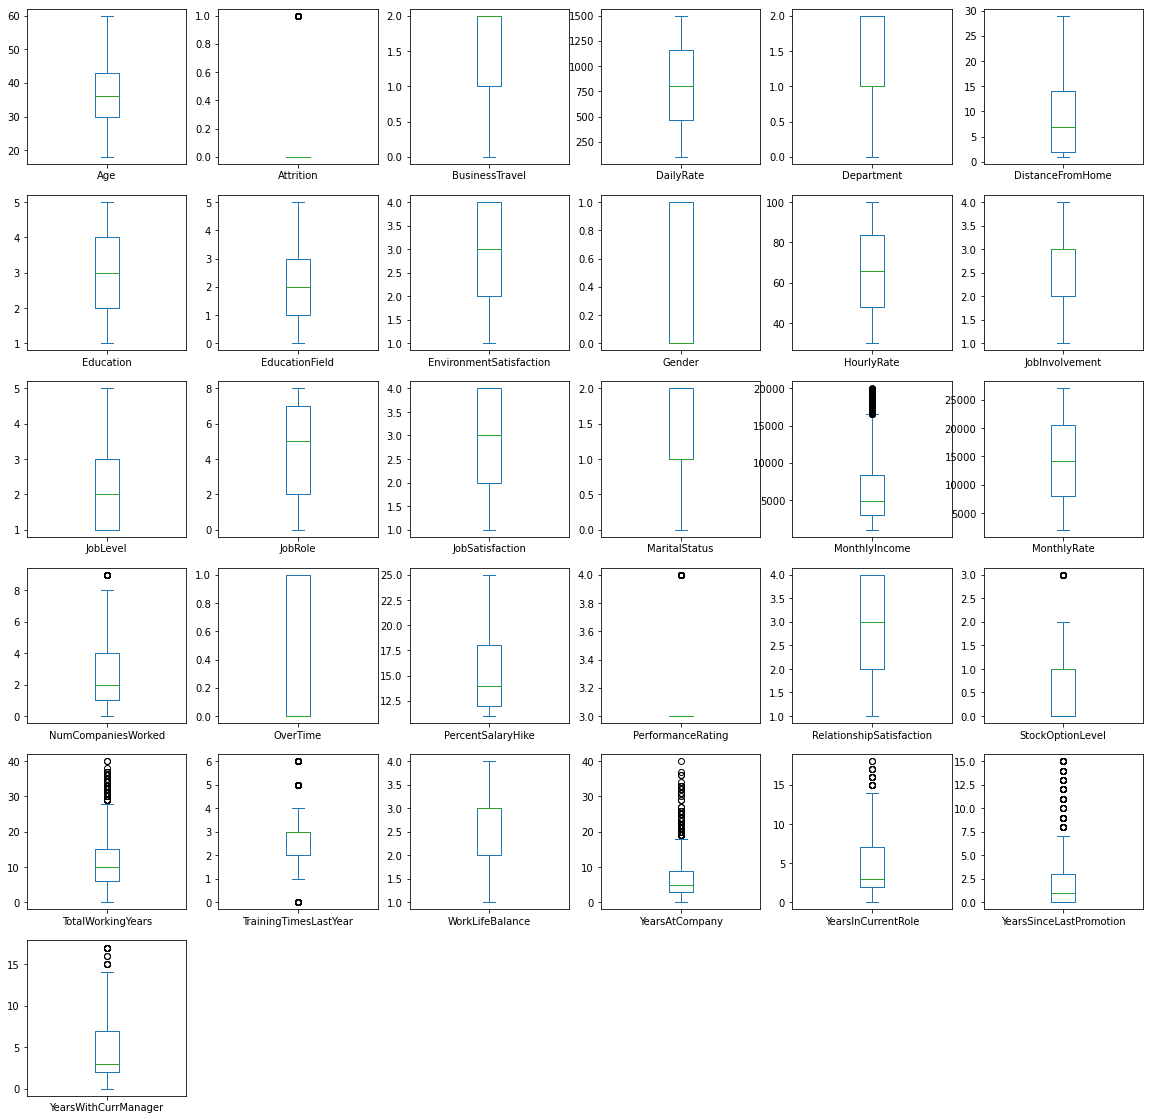

In [285]:
df2.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))
plt.show()

# Removing Outliers

# Splitting the variables

In [286]:
only_f=df2.drop('Attrition',axis=1)
lbl =df2['Attrition']

# we need to balance the data set
 - Using the over sampling techniques for class imbalance

In [290]:

from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [291]:
train_x,train_y=smt.fit_resample(only_f,lbl)

In [292]:
#after Applying SMOTE
train_y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# Now Dataset is Balanced .

In [293]:
#make dataframe
df3=pd.DataFrame(train_x)

In [294]:
df3['Attrition']=train_y

In [295]:
df3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1.000000,2,1,2,1,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,2.828427,1,1,3,0,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,1.414214,2,4,4,0,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,1.732051,4,1,4,1,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,1.414214,1,3,1,0,40,...,4,1,6,3,3,2,2,2,2,0


In [296]:
#checking shape of dataset
df3.shape

(2466, 31)

In [297]:
from scipy.stats import zscore
z=np.abs(zscore(df3))
threshold=3
df4=df3[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df3.shape[0]-df4.shape[0])/df3.shape[0])

percentage of loss of data by zscore is : 0.10665044606650446


In [301]:
#Independent variables
x=df4.drop('Attrition',axis=1)

In [303]:
#Dependent variables
y=df4['Attrition']

In [305]:
x.skew()

Age                         0.601179
BusinessTravel             -0.883073
DailyRate                   0.147563
Department                  0.224113
DistanceFromHome            0.266551
Education                  -0.118373
EducationField              0.609091
EnvironmentSatisfaction     0.028877
Gender                      0.987767
HourlyRate                 -0.018274
JobInvolvement             -0.301165
JobLevel                    1.185912
JobRole                    -0.435274
JobSatisfaction            -0.016669
MaritalStatus              -0.197575
MonthlyIncome               0.727622
MonthlyRate                 0.043141
NumCompaniesWorked          1.051482
OverTime                    1.000413
PercentSalaryHike           0.818814
PerformanceRating           2.748995
RelationshipSatisfaction   -0.031722
StockOptionLevel            1.025055
TotalWorkingYears           1.072057
TrainingTimesLastYear       0.583198
WorkLifeBalance            -0.416561
YearsAtCompany              1.181998
Y

In [306]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [307]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipeline=Pipeline(steps=[('s',scaler),('p',power)])

In [308]:
data=pipeline.fit_transform(x)

In [309]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

In [310]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.854069,0.850317,0.887586,1.552795,-1.633812,-0.761773,-0.918016,-0.366793,1.608710,1.510868,...,-0.325459,-1.438092,-0.797532,0.088835,-2.535554,-1.877196,0.463004,0.539530,-0.952574,0.870481
1,1.591093,-0.957889,-1.325951,-0.324768,0.088724,-1.755857,-0.918016,0.553580,-0.621616,-0.239553,...,3.072582,1.414549,1.131347,0.458515,0.412715,0.546464,1.244586,1.304791,0.155450,1.315944
2,0.427308,0.850317,1.499026,-0.324768,-1.191091,-0.761773,1.379412,1.408834,-0.621616,1.406490,...,-0.325459,-0.447110,-0.797532,-0.116057,0.412715,0.546464,-1.761417,-1.397593,-0.952574,-1.321101
3,-0.047715,-0.957889,1.540257,-0.324768,-0.875129,1.347437,-0.918016,1.408834,1.608710,-0.510661,...,-0.325459,0.500364,-0.797532,0.088835,0.412715,0.546464,0.897855,1.304791,1.174546,-1.321101
4,-0.872158,0.850317,-0.409530,-0.324768,-1.191091,-1.755857,0.807744,-1.376010,-0.621616,-1.390893,...,-0.325459,1.414549,1.131347,-0.336126,0.412715,0.546464,-0.809580,-0.239507,0.791718,-0.173701


In [311]:
#after removing skewness
x.skew()

Age                         0.008190
BusinessTravel             -0.432131
DailyRate                  -0.021782
Department                  0.022220
DistanceFromHome           -0.004142
Education                  -0.040296
EducationField              0.056069
EnvironmentSatisfaction    -0.069043
Gender                      0.987767
HourlyRate                 -0.052617
JobInvolvement             -0.043402
JobLevel                    0.361700
JobRole                    -0.196071
JobSatisfaction            -0.081325
MaritalStatus              -0.106836
MonthlyIncome               0.032512
MonthlyRate                -0.047565
NumCompaniesWorked          0.168961
OverTime                    1.000413
PercentSalaryHike           0.108271
PerformanceRating           2.748995
RelationshipSatisfaction   -0.082488
StockOptionLevel            0.488869
TotalWorkingYears           0.031142
TrainingTimesLastYear      -0.000660
WorkLifeBalance            -0.048478
YearsAtCompany              0.104776
Y

# VIF(Variance Inflation Factor)

In [312]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [313]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [314]:
vif()

,Variables,VIF Factor
0,Age,1.930517
1,BusinessTravel,1.059746
2,DailyRate,1.059563
3,Department,2.232574
4,DistanceFromHome,1.057693
5,Education,1.089490
6,EducationField,1.058302
7,EnvironmentSatisfaction,1.103307
8,Gender,1.075359
9,HourlyRate,1.040210


In [315]:

# BusinessTravel variable and DailyRate as same VIF Factor so,drop DailyRate variable
x.drop('DailyRate',inplace=True,axis=1)

In [316]:
# DistanceFromHome and Education variables as Same VIF Factor so , drop Education variable
x.drop('Education',axis=1,inplace=True)

In [317]:
# EnvironmentSatisfaction and JobInvolvement as Same VIF Factor so, drop JobInvolvement variable
x.drop('JobInvolvement',axis=1,inplace=True)

In [318]:
# PercentSalaryHike and PerformanceRating variables as same VIF Factor so, drop PerformanceRating variable
x.drop('PerformanceRating',axis=1,inplace=True)

In [319]:
#Gender And HourlyRate variable has Same VIF Factor So, drop HourlyRate variable
x.drop('HourlyRate',axis=1,inplace=True)

In [320]:
#After removing columns
x.shape

(2203, 25)

# Standard Scaler

In [322]:
from sklearn.preprocessing import MinMaxScaler

In [323]:
scale=MinMaxScaler()

In [324]:
x=scale.fit_transform(x)

In [325]:
#after applying MinMaxscaler
x.shape

(2203, 25)

# Model Building

In [326]:
#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [327]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [328]:
list_model=[lg,gnb,dtc,knc,svc,rfc,abc,gbc]

In [329]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

In [330]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.869894099848714 Random state:- 15


accuracy_score:- 0.848714069591528
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       300
           1       0.86      0.86      0.86       361

    accuracy                           0.85       661
   macro avg       0.85      0.85      0.85       661
weighted avg       0.85      0.85      0.85       661



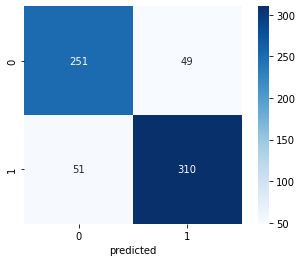

In [331]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

In [332]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.789712556732224 Random state:- 44


accuracy_score:- 0.75642965204236
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       327
           1       0.74      0.81      0.77       334

    accuracy                           0.76       661
   macro avg       0.76      0.76      0.76       661
weighted avg       0.76      0.76      0.76       661



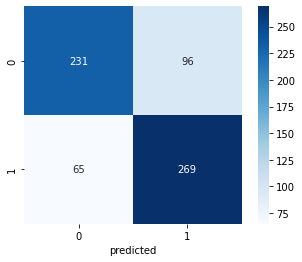

In [333]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=46)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

In [334]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8199697428139183 Random state:- 60


accuracy_score:- 0.7912254160363086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       308
           1       0.80      0.82      0.81       353

    accuracy                           0.79       661
   macro avg       0.79      0.79      0.79       661
weighted avg       0.79      0.79      0.79       661



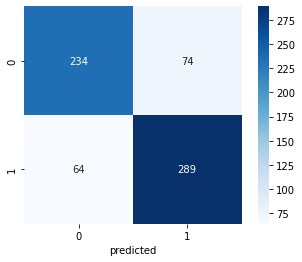

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [336]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8729198184568835 Random state:- 15


accuracy_score:- 0.8577912254160364
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       256
           1       0.93      0.83      0.88       405

    accuracy                           0.86       661
   macro avg       0.85      0.87      0.85       661
weighted avg       0.87      0.86      0.86       661



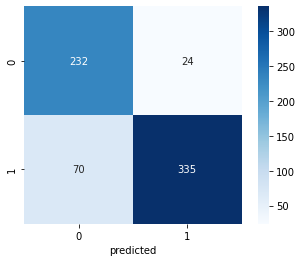

In [337]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

In [338]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9016641452344932 Random state:- 15


accuracy_score:- 0.8729198184568835
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       308
           1       0.89      0.87      0.88       353

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



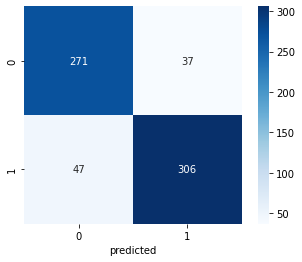

In [339]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

In [341]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9183055975794251 Random state:- 15


accuracy_score:- 0.9198184568835098
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       313
           1       0.91      0.94      0.93       348

    accuracy                           0.92       661
   macro avg       0.92      0.92      0.92       661
weighted avg       0.92      0.92      0.92       661



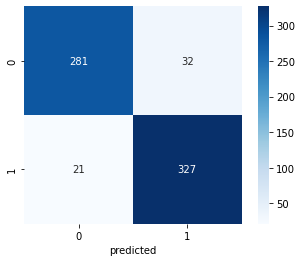

In [342]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

In [343]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.886535552193646 Random state:- 91


accuracy_score:- 0.8623298033282905
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       299
           1       0.88      0.87      0.87       362

    accuracy                           0.86       661
   macro avg       0.86      0.86      0.86       661
weighted avg       0.86      0.86      0.86       661



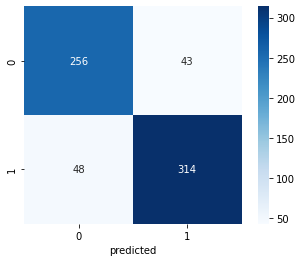

In [344]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

In [345]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9046898638426626 Random state:- 5


accuracy_score:- 0.8774583963691377
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       295
           1       0.89      0.89      0.89       366

    accuracy                           0.88       661
   macro avg       0.88      0.88      0.88       661
weighted avg       0.88      0.88      0.88       661



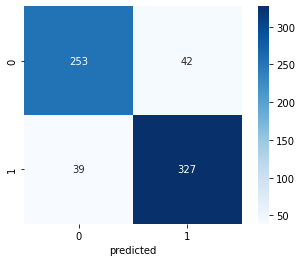

In [346]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=39)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

# Cross Validation

In [347]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.66213152 0.89342404 0.84353741 0.84545455 0.86136364]
0.8211822304679448
GaussianNB()
[0.68027211 0.78911565 0.74829932 0.77045455 0.77727273]
0.7530828695114409
DecisionTreeClassifier()
[0.68707483 0.83900227 0.82312925 0.80227273 0.81818182]
0.7939321789321789
KNeighborsClassifier()
[0.77097506 0.87755102 0.84353741 0.84090909 0.88636364]
0.8438672438672439
SVC()
[0.6553288  0.91836735 0.88662132 0.89545455 0.90909091]
0.852972582972583
RandomForestClassifier()
[0.73469388 0.94331066 0.90929705 0.91363636 0.92954545]
0.8860966810966809
AdaBoostClassifier()
[0.63718821 0.91836735 0.86621315 0.86363636 0.89772727]
0.836626468769326
GradientBoostingClassifier()
[0.6553288  0.94331066 0.9138322  0.90227273 0.91363636]
0.8656761492475779


In [348]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [349]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=5)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8968877400916236
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy', max_features='auto')


In [350]:
grid_pred=rfc_grid.predict(x_test)

In [351]:
def confusion_plot1():
    print('accuracy_score:-',accuracy_score(grid_pred,y_test))
    print(rfc_grid.best_estimator_)
    print(rfc_grid.best_params_)
    print('\nClassification Report')
    print(classification_report(grid_pred,y_test))
    matrix = confusion_matrix(grid_pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

accuracy_score:- 0.8910741301059002
RandomForestClassifier(criterion='entropy', max_features='auto')
{'criterion': 'entropy', 'max_features': 'auto'}

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       298
           1       0.89      0.91      0.90       363

    accuracy                           0.89       661
   macro avg       0.89      0.89      0.89       661
weighted avg       0.89      0.89      0.89       661



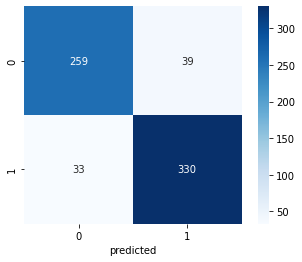

In [352]:
confusion_plot1()

# ROC Curve

In [353]:
rfc_pred=rfc_grid.best_estimator_.predict_proba(x_test)

In [354]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class=2

In [355]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rfc_pred[:,i], pos_label=i)

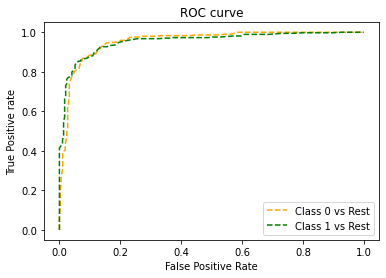

In [356]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC Curve',dpi=300); 

# Save the Model

In [357]:
import joblib
joblib.dump(rfc_grid.best_estimator_,'HR_Analytics_Project.obj')

['HR_Analytics_Project.obj']